Downloading data:

In [1]:
batch_size = 200
data_dir = '/home/clewis7/repos/stor566-notebooks/hmw2/hmw2-data/'

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import numpy as np
import torch.utils.data as td
import random, time
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from torch.utils.data.sampler import SubsetRandomSampler

## USE THIS SNIPPET TO GET BINARY TRAIN/TEST DATA

train_data = datasets.MNIST(data_dir, train=True, download=False,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ]))
# Once you have downloaded the data by setting download=True, you can
# change download=True to download=False
test_data = datasets.MNIST(data_dir, train=False, download=False,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ]))

subset_indices = ((train_data.targets == 0) + (train_data.targets == 1)).nonzero()
train_loader = torch.utils.data.DataLoader(train_data,batch_size=batch_size, 
  shuffle=False,sampler=SubsetRandomSampler(subset_indices.view(-1)))

subset_indices = ((test_data.targets == 0) + (test_data.targets == 1)).nonzero()
test_loader = torch.utils.data.DataLoader(test_data,batch_size=len(test_data), 
  shuffle=False,sampler=SubsetRandomSampler(subset_indices.view(-1)))

### 1. (20 points) Implement **Logistic Regression** with Pytorch to do handwritten digit 0 vs. 1 classification. Pick an optimizer yourself. 

In [54]:
class LogisticRegression(torch.nn.Module):
     def __init__(self, input_dim, output_dim):
         super(LogisticRegression, self).__init__()
         self.linear = torch.nn.Linear(input_dim, output_dim)
         self.linear.weight.data.fill_(1)
            
     def forward(self, x):
         out = torch.sigmoid(self.linear(x))
         return out

In [55]:
input_dim = 28*28
output_dim = 1
model = LogisticRegression(input_dim,output_dim)

In [56]:
criterion = torch.nn.BCELoss()

In [57]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.05, momentum=0.9)

In [58]:
from tqdm import tqdm

epochs = iterations / (total data / batch size)

In [59]:
# The number of epochs is at least 10, you can increase it to achieve better performance
num_epochs = 25

avg_losses = list()

# Training the Model
for epoch in tqdm(range(num_epochs)):
    batch_losses = list()
    for i, (images, labels) in enumerate(train_loader):
        # Convert the 28*28 image matrix into a 784-dim vector
        images = images.view(-1, 28*28).requires_grad_()
        labels = labels
        # Convert labels from 0,1 to -1,1
        #labels = 2*(labels.float()-0.5)
        
        # TODO 
        # 1. Compute Loss. Check torch functions for the corresponding loss for Logistic and SVM
        optimizer.zero_grad()
    
        prediction = model.forward(images)
        
        batch_loss = criterion(prediction, labels.reshape(-1,1).to(torch.float32))
        
        batch_loss.backward()
        
        # 2. Do optimization. Check torch.optim to see how to do optimization with pytorch
        optimizer.step()
    
        # 3. Save batch loss
        batch_losses.append(batch_loss.detach().numpy())

    # Save average epoch loss
    avg_epoch_loss = (1 / batch_size) * np.sum(batch_losses)
    avg_losses.append(avg_epoch_loss)
    
    
    

100%|███████████████████████████████████████████| 25/25 [00:26<00:00,  1.07s/it]


In [60]:
batch_loss

tensor(0., grad_fn=<BinaryCrossEntropyBackward0>)

### (a) (5 points) Report the hyper-parameters (number of epochs, learning rate, momentum etc).

**Hyper-Parameters**

Number of Epochs: 25

Learning Rate: 0.01

Momentum: 0.9

### (b) (10 points) Report the **Average loss of an epoch** for every epoch by generating Average Loss vs. Epoch plot. Please report at least **10** epochs.

In [9]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Average Loss')

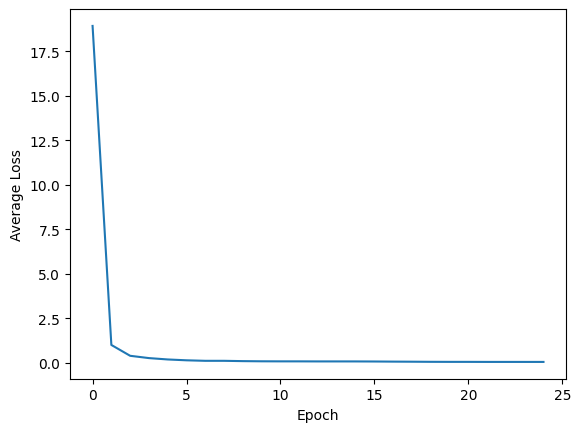

In [10]:
plt.plot(avg_losses)
plt.xlabel("Epoch")
plt.ylabel("Average Loss")

### (c) (5 points) Report the final testing accuracy of trained model.

In [11]:
correct = 0

images, labels = next(iter(test_loader))

outputs = model.forward(images.view(-1, 28*28))
outputs = outputs.detach().numpy().astype(int).ravel()

labels = labels.detach().numpy().astype(int)

for output, label in zip(outputs, labels):
    if output == label:
        correct += 1

accuracy = correct / len(labels)

In [12]:
accuracy

0.9985815602836879

In [13]:
import seaborn as sns

In [14]:
list(model.parameters())[0].shape

torch.Size([1, 784])

<AxesSubplot:>

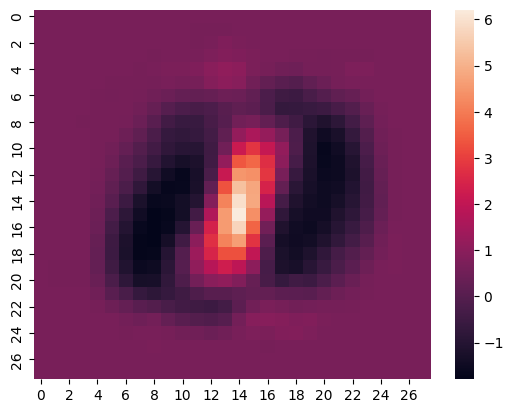

In [15]:
sns.heatmap(list(model.parameters())[0].data.detach().numpy().reshape(28,28))

### 2. (20 points) Implement **Linear SVM** with Pytorch to do handwritten digit 0 vs. 1 classification. Pick an optimizer yourself. 

### (a) (5 points) Report the hyper-parameters (number of epochs, learning rate, momentum etc).

In [65]:
class LinearSVM(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearSVM, self).__init__()
        self.linear = torch.nn.Linear(input_dim, output_dim)

    def forward(self, x):
        out = self.linear(x).clamp(-1,1)
        return out

In [143]:
def hinge_loss(weights, prediction, actual):
    
    x = torch.max(torch.zeros(prediction.ravel().size()[0]),
                  (1 - actual.ravel() * prediction.ravel())).mean()
    
    # l2norm = torch.inner(weights.ravel().T, weights.ravel()) / 2
    
    # loss = x + l2norm
    
    return x

In [144]:
input_dim = 28*28
output_dim = 1
model = LinearSVM(input_dim,output_dim)

In [145]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.05, momentum=0.9)

In [146]:
loss_func = hinge_loss

In [147]:
# The number of epochs is at least 10, you can increase it to achieve better performance
num_epochs = 25

avg_losses = list()

# Training the Model
for epoch in tqdm(range(num_epochs)):
    batch_losses = list()
    for i, (images, labels) in enumerate(train_loader):
        # Convert the 28*28 image matrix into a 784-dim vector
        images = images.view(-1, 28*28)
        # Convert labels from 0,1 to -1,1
        labels = 2*(labels.float()-0.5)
        
        # TODO 
        # 1. Compute Loss. Check torch functions for the corresponding loss for Logistic and SVM
        optimizer.zero_grad()
    
        prediction = model.forward(images)
        weights = list(model.parameters())[0].data
        
        batch_loss = loss_func(weights, prediction, labels.reshape(-1,1).to(torch.float32))
        
        batch_loss.backward()
        
        # 2. Do optimization. Check torch.optim to see how to do optimization with pytorch
        optimizer.step()
    
        # 3. Save batch loss
        batch_losses.append(batch_loss.detach().numpy())

    # Save average epoch loss
    avg_epoch_loss = (1 / batch_size) * np.sum(batch_losses)
    avg_losses.append(avg_epoch_loss)

100%|███████████████████████████████████████████| 25/25 [00:26<00:00,  1.07s/it]


### (b) (10 points) Report the **Average loss of an epoch** for every epoch by generating Average Loss vs. Epoch plot. Please report at least **10** epochs.

Text(0, 0.5, 'Average Loss')

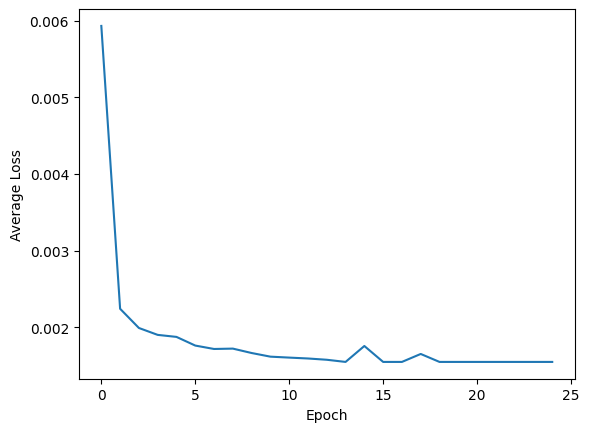

In [148]:
plt.plot(avg_losses)
plt.xlabel("Epoch")
plt.ylabel("Average Loss")

### (c) (5 points) Report the final testing accuracy of trained model.

In [157]:
correct = 0

images, labels = next(iter(test_loader))

outputs = model.forward(images.view(-1, 28*28))
outputs = outputs.detach().numpy().astype(int).ravel()

outputs[outputs < 0] = 0

labels = labels.reshape(-1,1).to(torch.float32)
labels = labels.detach().numpy().astype(int)

for output, label in zip(outputs, labels):
    if output == label:
        correct += 1

accuracy = correct / len(labels)

In [160]:
accuracy

0.9990543735224586

## Problem 2 (60 points)

In this problem you will practice implementing MLP and CNN to classify daily life images (CIFAR10).

**Data.** You will use CIFAR10 classification dataset (10 classes). Pytorch/torchvision has provide a useful dataloader to automatically download and load the data into batches. Code of the data loader has been provided in the template. Please don't modify the data loading part.

In [24]:
## Data loading code chunk, please don't modify it. 
## However, you can adjust the batch size if you want to.
batch_size_cifar = 64
data_dir = './data'

def cifar_loaders(batch_size, shuffle_test=False): 
    normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                     std=[0.225, 0.225, 0.225])
    train = datasets.CIFAR10(data_dir, train=True, download=False, 
        transform=transforms.Compose([
            transforms.RandomHorizontalFlip(),
            transforms.RandomCrop(32, 4),
            transforms.ToTensor(),
            normalize,
        ]))
    # Once you have downloaded the data by setting download=True, you can
    # change download=True to download=False
    test = datasets.CIFAR10(data_dir, train=False, 
        transform=transforms.Compose([transforms.ToTensor(), normalize]))
    train_loader = torch.utils.data.DataLoader(train, batch_size=batch_size,
        shuffle=True, pin_memory=True)
    test_loader = torch.utils.data.DataLoader(test, batch_size=batch_size,
        shuffle=shuffle_test, pin_memory=True)
    return train_loader, test_loader

train_loader, test_loader = cifar_loaders(batch_size_cifar)

In [32]:
train_loader.dataset

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               RandomHorizontalFlip(p=0.5)
               RandomCrop(size=(32, 32), padding=4)
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.225, 0.225, 0.225])
           )

### **Problem Description.**
### 1. (20 points) Implement a 7 layers fully-connected neural networks with ReLU activation to do image classification. 

In [33]:
class NeuralNetModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(NeuralNetModel, self).__init__()
        self.layer1 = nn.Linear(input_dim, hidden_dim) 
        self.layer1.weight.data.fill_(1)
        self.layer2 = nn.Linear(hidden_dim, output_dim)  
        self.layer3 = nn.Linear(hidden_dim, output_dim)  
        self.layer4 = nn.Linear(hidden_dim, output_dim)  
        self.layer5 = nn.Linear(hidden_dim, output_dim)  
        self.layer6 = nn.Linear(hidden_dim, output_dim)  
        self.layer7 = nn.Linear(hidden_dim, output_dim)  
        
        self.relu = nn.ReLU()
    
    def forward(self, x):
        # Linear function  # LINEAR
        x = self.layer1(x)
        x = self.relu(x)
        x = self.layer2(x)
        x = self.relu(x)
        x = self.layer3(x)
        x = self.relu(x)
        x = self.layer4(x)
        x = self.relu(x)
        x = self.layer5(x)
        x = self.relu(x)
        x = self.layer6(x)
        x = self.relu(x)
        x = self.layer7(x)
        x = self.relu(x)
        
        out = x
        return(out)

In [34]:
input_dim = 32*32
hidden_dim = 5
output_dim = 10
model = NeuralNetModel(input_dim, hidden_dim, output_dim)

In [35]:
criterion = nn.CrossEntropyLoss()

In [36]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.05, momentum=0.9)

In [37]:
num_epochs = 25

avg_losses = list()

# Training the Model
for epoch in tqdm(range(num_epochs)):
    batch_losses = list()
    for i, (images, labels) in enumerate(train_loader):
        # Convert the 28*28 image matrix into a 784-dim vector
        images = images.view(-1, 32*32).requires_grad_()
        labels = labels
        # Convert labels from 0,1 to -1,1
        #labels = 2*(labels.float()-0.5)
        
        # TODO 
        # 1. Compute Loss. Check torch functions for the corresponding loss for Logistic and SVM
        optimizer.zero_grad()
    
        prediction = model.forward(images)
        
        batch_loss = criterion(prediction, labels.reshape(-1,1).to(torch.float32))
        
        batch_loss.backward()
        
        # 2. Do optimization. Check torch.optim to see how to do optimization with pytorch
        optimizer.step()
    
        # 3. Save batch loss
        batch_losses.append(batch_loss.detach().numpy())

    # Save average epoch loss
    avg_epoch_loss = (1 / batch_size) * np.sum(batch_losses)
    avg_losses.append(avg_epoch_loss)

  0%|                                                    | 0/25 [00:00<?, ?it/s]


RuntimeError: mat1 and mat2 shapes cannot be multiplied (192x10 and 5x10)

### (a) (5 points) Print the model architecture.

In [ ]:
network = NeuralNetModel() #__init__ function is called
output = my_nn(x) # forward function is called here (when we feed the input data x )
                  # with initial weights

### (b) (10 points) Report the **Average loss of an epoch** for every epoch by generating Average Loss vs. Epoch plot. Please report at least **10** epochs.

### (c) (5 points) Report the final testing accuracy of trained model.

### 2. (30 points) Implement a 7 layers CNN with 4 convolutional layers, 3 fully-connected layers and ReLU activation function. The input dimension of the 1st fully-connected layer must be 4096.

### (a) (5 points) Print the model architecture.

### (b) (10 points) Report the **Average loss of an epoch** for every epoch by generating Average Loss vs. Epoch plot. Please report at least **10** epochs.

### (c) (5 points) Report the final testing accuracy of trained model.

### (d) (10 points) Write a new cifar$\_$loaders function to try different data augmentation methods.

### 3. (10 points) Please compare the results of the two models (MLP and CNN).